In [1]:
import numpy as np
import time
import hf
import Lab_2.statistics as statistics


### Parameters


COUNT = 100000

DENSITY = 1000

VALS_PART = 0.0005
WIDTH_PART = 0.2
CUT_COEFF = 1

STEP = 1

WINDOW = 1

MIN_VALUE = -hf.RAND_MAX
MAX_VALUE = hf.RAND_MAX

ALPHA = 0.05

In [2]:
### Preparations


hf.set_seed(time.time_ns() % hf.RAND_MAX)


def clear(distribution):
    return statistics.clear(distribution, VALS_PART, WIDTH_PART, CUT_COEFF)
    #return distribution


def sort(values):
    return np.sort(values)


def generate_vals(n):
    return [ hf.random() / hf.RAND_MAX for _ in range(n) ]


sorted_random_vals = sort(generate_vals(COUNT))

## Задание 1. Имитация непрерывных случайных величин

Label(value='Select distribution type')

Dropdown(options=('NORMAL', 'EXPONENTIAL'), value='NORMAL')

Button(description='Ok', style=ButtonStyle())

Label(value='Mean')

FloatText(value=0.0)

Button(description='Ok', style=ButtonStyle())

Label(value='Standart deviation')

FloatText(value=0.0)

Button(description='Ok', style=ButtonStyle())

Calculated mean:  90.16852995800413
Calculated std:  59.89790591483627
Is suited:  True


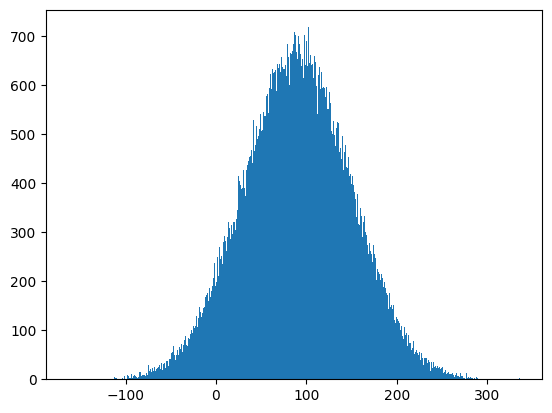

In [3]:
### Continuous distribution


distribution_type = statistics.ContinuousDistribution[hf.selector("Select distribution type", list(statistics.ContinuousDistribution.__members__.keys()))]

match distribution_type:
    case statistics.ContinuousDistribution.NORMAL:
        mean = hf.float_input("Mean", MIN_VALUE, MAX_VALUE, 1)[0]
        std = hf.float_input("Standart deviation", 0, MAX_VALUE, 1, False)[0]
    case statistics.ContinuousDistribution.EXPONENTIAL:
        mean = hf.float_input("Mean", 0, MAX_VALUE, 1, False)[0]
        std = None


inverse_distribution_function = statistics.INVERSE_CONTINUOUS_DISTRIBUTION_GENERATORS[distribution_type](mean, std)

distribution = statistics.approximate(clear(statistics.generate_continuous_distribution(inverse_distribution_function, sorted_random_vals)), WINDOW)

statistic_mean = statistics.get_expected_value(distribution)
statistic_std = statistics.get_variance(distribution, statistic_mean) ** 0.5

match distribution_type:
    case statistics.ContinuousDistribution.NORMAL:
        distribution_function = statistics.DISTRIBUTION_GENERATORS[distribution_type](statistic_mean, statistic_std)
    case statistics.ContinuousDistribution.EXPONENTIAL:
        distribution_function = statistics.DISTRIBUTION_GENERATORS[distribution_type](statistic_mean, None)
       
is_suited = statistics.check_distribution(distribution_function, distribution, ALPHA)

print("Calculated mean: ", statistic_mean)
print("Calculated std: ", statistic_std)
print("Is suited: ", is_suited)

statistics.draw_hist(distribution, STEP)

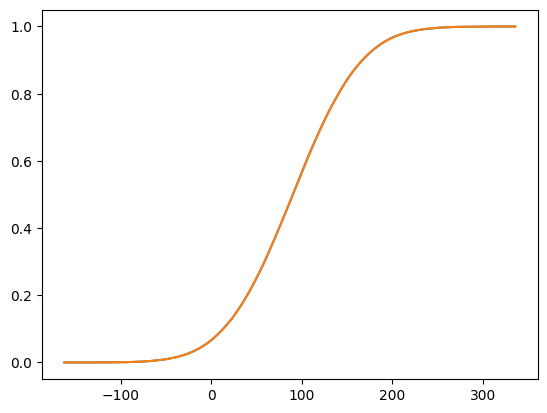

In [4]:

statistics.draw_distribution_plot(distribution, DENSITY, distribution[0], distribution[-1])
statistics.draw_plot(distribution_function, DENSITY, distribution[0], distribution[-1])

## Задание 2. Имитация дискретных случайных величин

Label(value='Select distribution type')

Dropdown(options=('GEOMETRIC', 'POISSON'), value='GEOMETRIC')

Button(description='Ok', style=ButtonStyle())

Label(value='Mean')

FloatText(value=0.0)

Button(description='Ok', style=ButtonStyle())

Calculated mean:  10.00983
Calculated std:  3.156775787270932
Is suited:  True


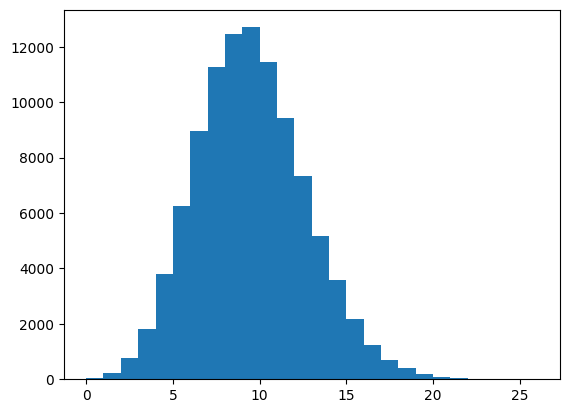

In [5]:
### Discrete distribution


distribution_type = statistics.DiscreteDistribution[hf.selector("Select distribution type", list(statistics.DiscreteDistribution.__members__.keys()))]

match distribution_type:
    case statistics.DiscreteDistribution.POISSON:
        mean = hf.float_input("Mean", 0, MAX_VALUE, 1, False)[0]
        std = None
    case statistics.DiscreteDistribution.GEOMETRIC:
        mean = hf.float_input("Mean", 1, MAX_VALUE, 1)[0]
        std = None

distribution_function = statistics.DISTRIBUTION_GENERATORS[distribution_type](mean, std)

distribution = statistics.approximate(clear(statistics.generate_discrete_distribution(distribution_function, sorted_random_vals)), WINDOW)

statistic_mean = statistics.get_expected_value(distribution)
statistic_std = statistics.get_variance(distribution, statistic_mean) ** 0.5

match distribution_type:
    case statistics.DiscreteDistribution.POISSON:
        distribution_function = statistics.DISTRIBUTION_GENERATORS[distribution_type](statistic_mean, None)
    case statistics.DiscreteDistribution.GEOMETRIC:
        distribution_function = statistics.DISTRIBUTION_GENERATORS[distribution_type](statistic_mean, None)


is_suited = statistics.check_distribution(distribution_function, distribution, ALPHA)

print("Calculated mean: ", statistic_mean)
print("Calculated std: ", statistic_std)
print("Is suited: ", is_suited)

statistics.draw_hist(distribution, STEP)

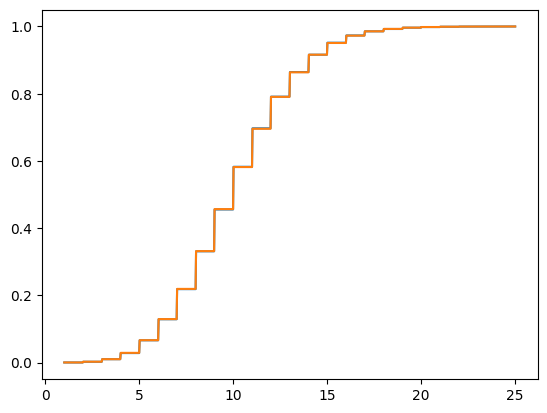

In [6]:

statistics.draw_distribution_plot(distribution, DENSITY, distribution[0], distribution[-1])
statistics.draw_plot(distribution_function, DENSITY, distribution[0], distribution[-1])